# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>


- Data Exploration

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

###**Concise Description of Problem** :
Focusing on the ultimate goal, which comprehends to combine the actual and past bike usage pattern with season in order to forecast **Bike Sharing Demand**







###**Importing the Required libraries and Modules.**

In [1]:
#importing pandas, numpy and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

#Date and time library
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



Ready to Mount the drive and Load the Data Set...

In [2]:
#Mount the google drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Loading the Data**

In [3]:
#importing the dataset
path = ('/content/drive/MyDrive/Capstone_Supervised_ML/Copy of SeoulBikeData.csv')

#dataframe
df = pd.read_csv(path, encoding="ISO-8859-1") #ISO/IEC 8859-1 encodes what it refers to as "Latin alphabet no. 1"


###**Exploratory Data Analysis**

In [4]:
#Checking the shape of the data
df.shape

(8760, 14)

In [5]:
#First few Observations
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


###**Feature Data types**

In [7]:
print("Features:",df.columns)

Features: Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

###**Statistics of Feature Data Set**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

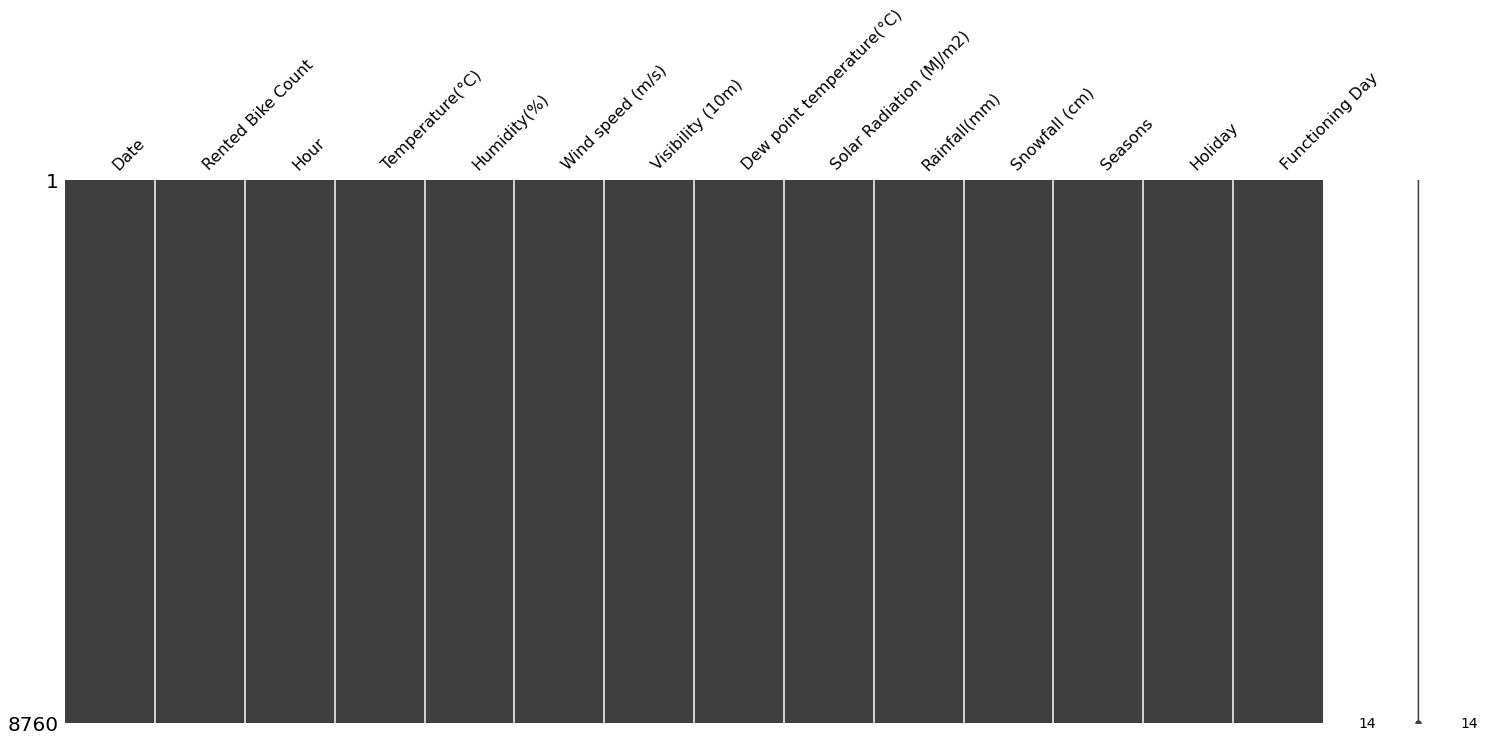

In [ ]:
msno.matrix(df) #to identify the null falues via matrix visualization


In [ ]:
#checking missing values if any...
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Changing the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [10]:
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [11]:
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [12]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

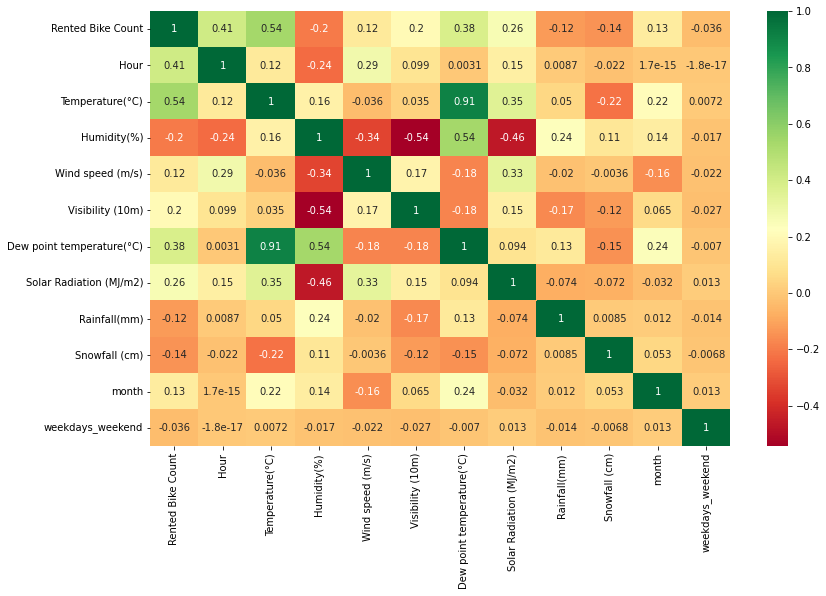

In [ ]:
#checking the coorelation: 
plt.figure(figsize =(13,8))
sns.heatmap(df.corr(), cmap = 'RdYlGn' , annot= True)

####Multicollinearity occurs when two or more independent variables(also known as predictor) are highly correlated with one another in a regression model.

In [13]:
#checking if there's multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif) 
  

  

In [14]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.960112
1,Temperature(°C),3.288623
2,Humidity(%),6.155420
3,Wind speed (m/s),4.651787
4,Visibility (10m),5.359009
5,Solar Radiation (MJ/m2),2.260940
6,Rainfall(mm),1.080309
7,Snowfall (cm),1.131108
8,month,5.009301
9,weekdays_weekend,1.380635


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


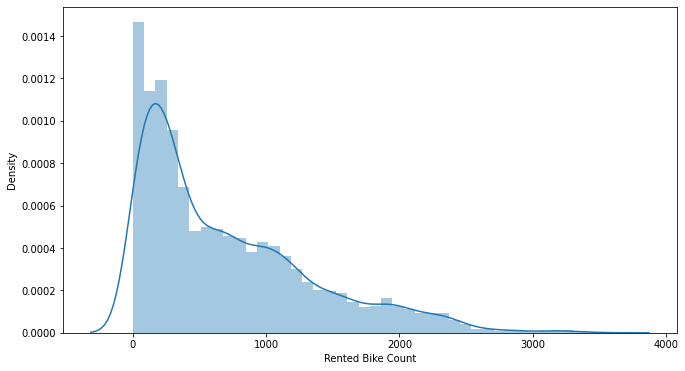

In [15]:
#visualizing the distribution of Rented Bike Count
plt.figure(figsize=(11,6))
sns.distplot(df['Rented Bike Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


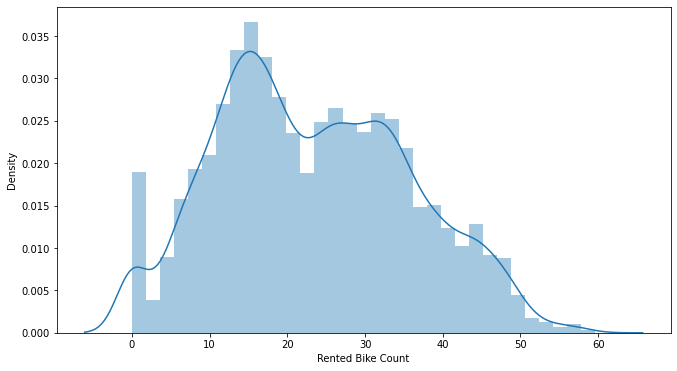

In [16]:
#Square_root transformation of Rented Bike Count
plt.figure(figsize=(11,6))
sns.distplot(np.sqrt(df['Rented Bike Count']))

Focusing on the numeric features...

In [17]:
num_feat= df.select_dtypes(exclude='object')
num_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [18]:
# returning description of the numeric features in the DataFrame
num_feat.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


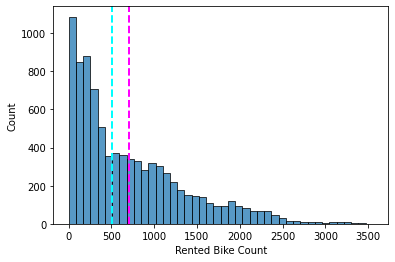

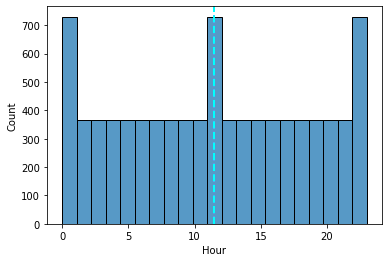

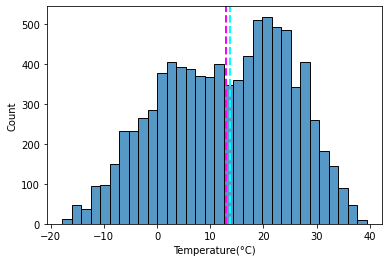

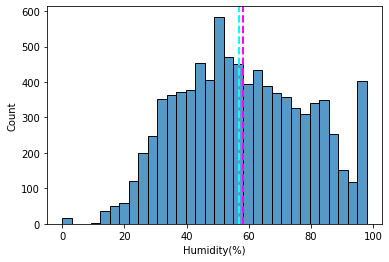

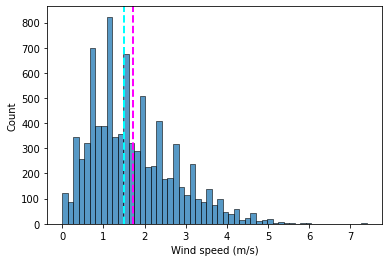

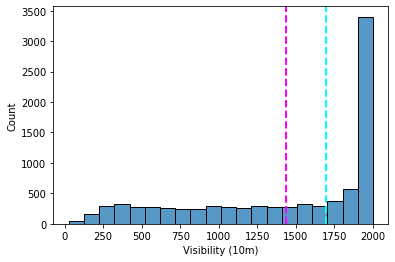

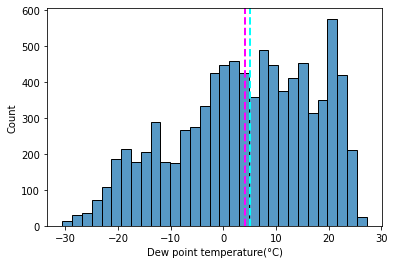

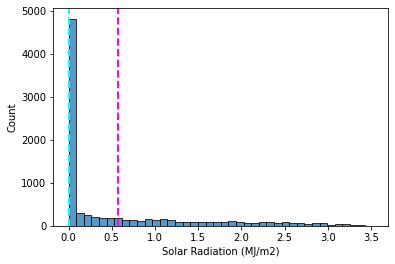

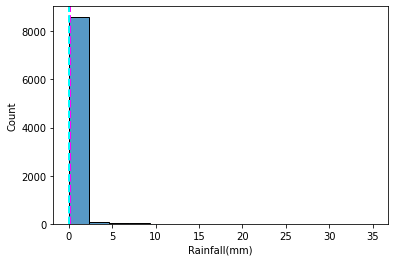

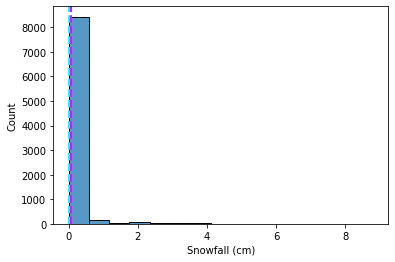

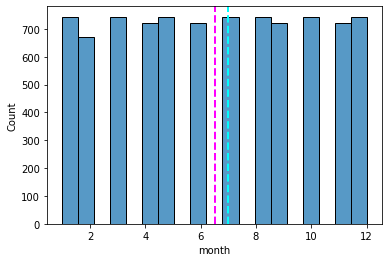

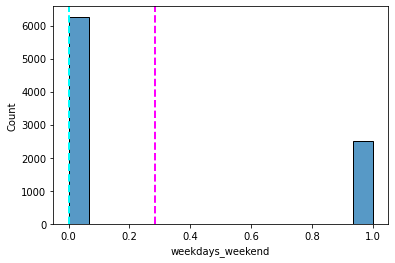

In [19]:
#plotting distplot
for col in num_feat[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

Ploting the regression Plot of each column dataset v/s rented bike count columns

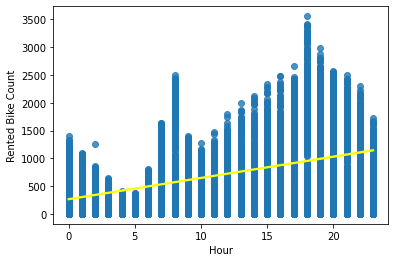

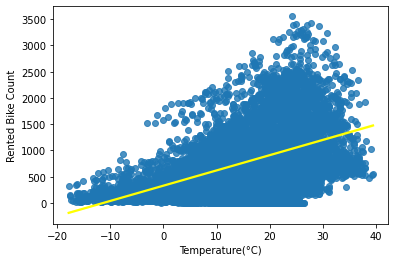

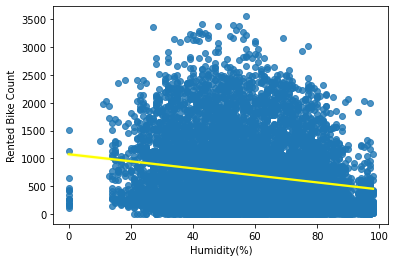

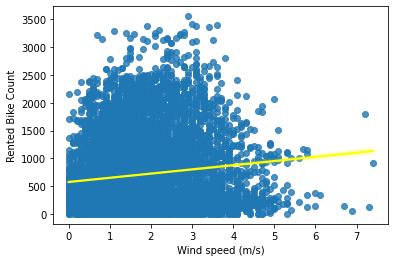

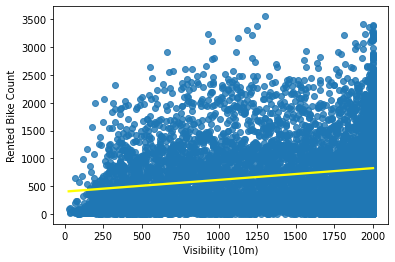

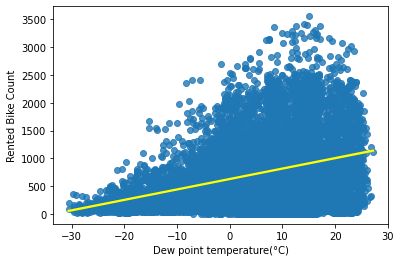

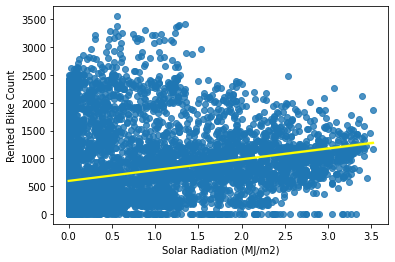

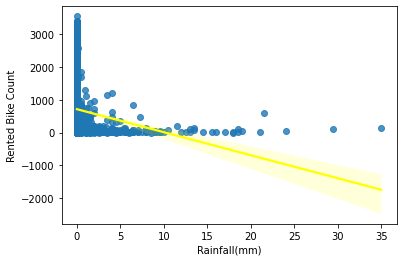

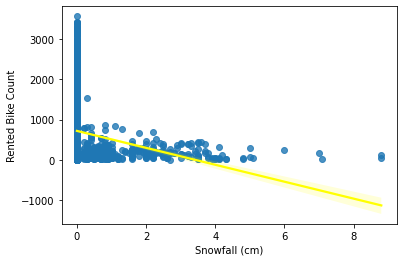

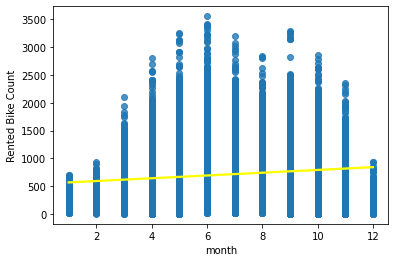

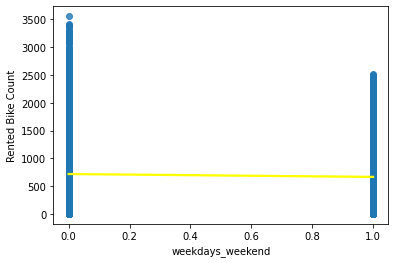

In [20]:
#regression plot
for col in num_feat[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col], y=df['Rented Bike Count'],line_kws={"color":"yellow"})
  plt.show()

In [21]:
#Extricate the categorical features
cat_feat = df.select_dtypes(include='object')
cat_feat

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [22]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

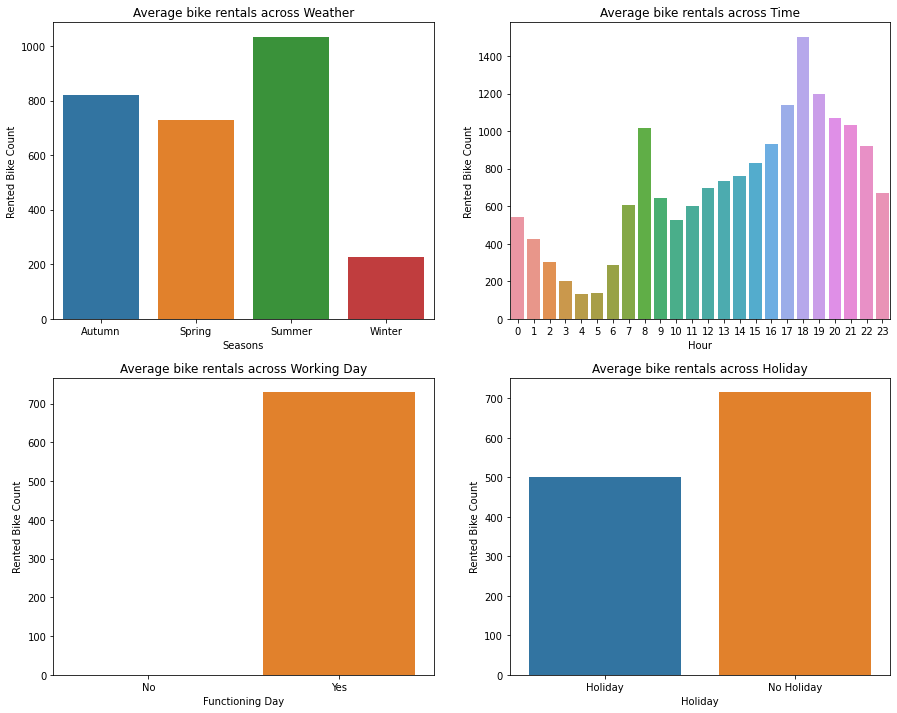

In [23]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_weather = pd.DataFrame(df.groupby(['Seasons'])['Rented Bike Count'].mean()).reset_index()
sns.barplot(data=group_weather, x='Seasons', y='Rented Bike Count', ax=axes)
axes.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Average bike rentals across Weather')

axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(df.groupby(['Hour'])['Rented Bike Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Hour', y='Rented Bike Count', ax=axes)
axes.set(xlabel='Hour', ylabel='Rented Bike Count', title='Average bike rentals across Time')

axes = fig.add_subplot(2, 2, 3)
group_workingday = pd.DataFrame(df.groupby(['Functioning Day'])['Rented Bike Count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='Functioning Day', y='Rented Bike Count', ax=axes)
axes.set(xlabel='Functioning Day', ylabel='Rented Bike Count', title='Average bike rentals across Working Day')

axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(df.groupby(['Holiday'])['Rented Bike Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Holiday', y='Rented Bike Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Rented Bike Count', title='Average bike rentals across Holiday')
plt.show()

**Insights Received from the analysis**: During Winters the Demand of the Bike Sharing is Low compared to other Seasons, Where Summers seasons aces the demands of rental bikes,

Moreover Demands of Rental Bikes are Slightly Higher in Non holidays,

And almost Zero demand on Non functional Day.

After getting the insights of the EDA that there is much less demand in the season of winter.

###Running a test to check the average biked rented  per hours:

In [ ]:
avrg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

avrg_rent_hrs

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

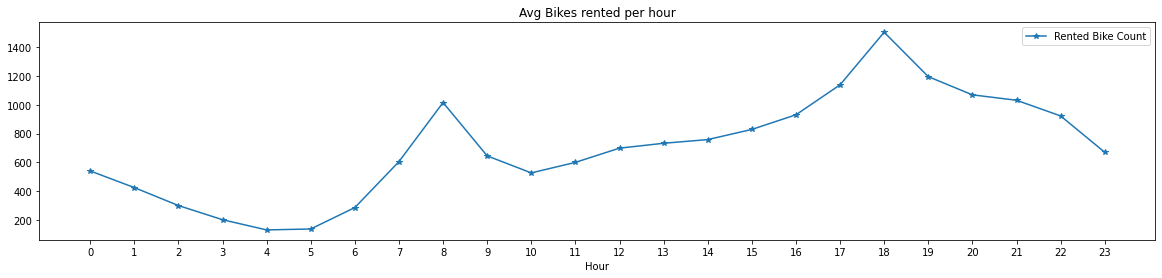

In [ ]:
#Plotting the data
plt.figure(figsize=(20,4))
h=avrg_rent_hrs.plot(marker ='*', legend=True, title='Avg Bikes rented per hour')
h.set_xticks(range(len(avrg_rent_hrs)));
h.set_xticks(avrg_rent_hrs.index.tolist());

###We can conclude that there's rush in the demand between 8:00 Am to 9:00 pm which clearly points to opening and closing time of industries, offices, colleges etc.  

In [ ]:
#Creating a dummy variable for categorical columns
dummy_cat_feat = pd.get_dummies(cat_feat,drop_first=True)
dummy_cat_feat

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [ ]:
#Merging the numeric and dummy_categorical columns resulting to create a final dataframe
final_df =  pd.concat([dummy_cat_feat,num_feat],axis=1)


In [ ]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40


Monthly Distribution

In [ ]:
group_month = pd.DataFrame(df.groupby(['month', 'Functioning Day'])['Rented Bike Count'].mean()).reset_index()


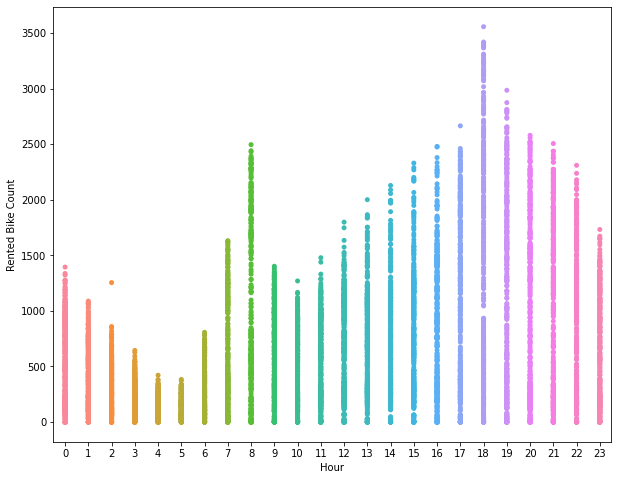

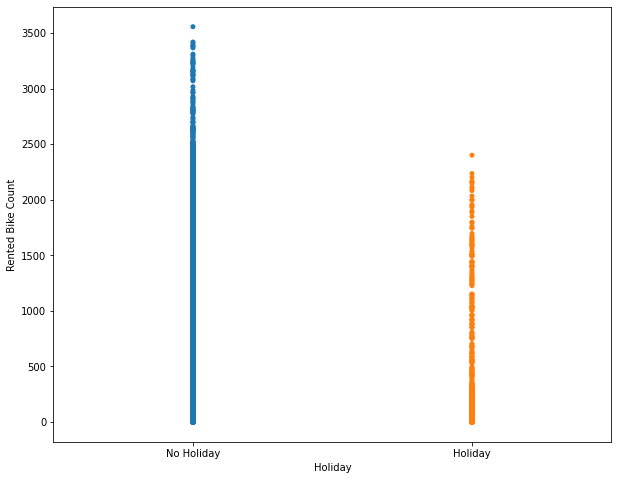

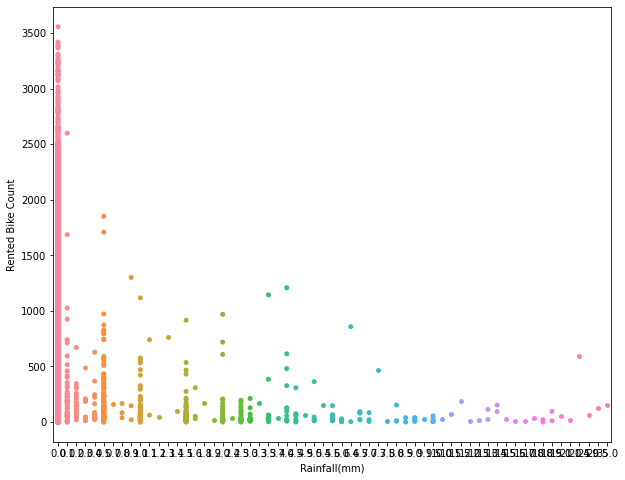

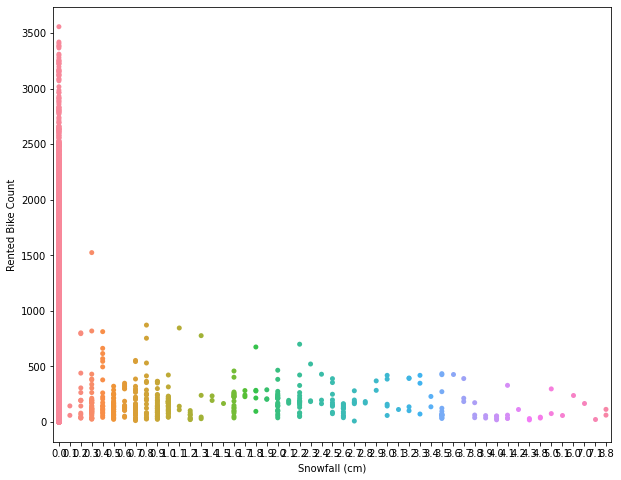

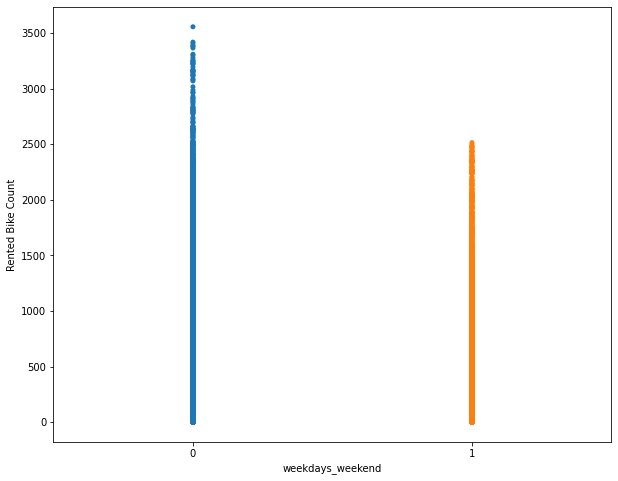

In [ ]:
#plotting on features to get some information
feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for features in feature_list:
  plt.figure(figsize=(10,8))
  sns.stripplot(x=features, y = 'Rented Bike Count',jitter=False, data=df)
  plt.show()

<Figure size 504x288 with 0 Axes>

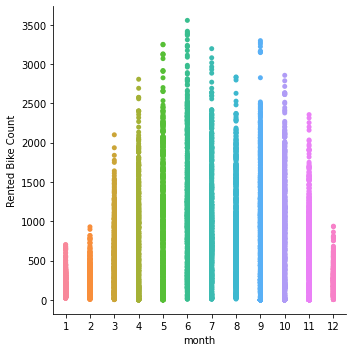

In [ ]:
plt.figure(figsize=(7,4))
sns.catplot(x='month',y='Rented Bike Count',jitter=False,data=df)
plt.show()

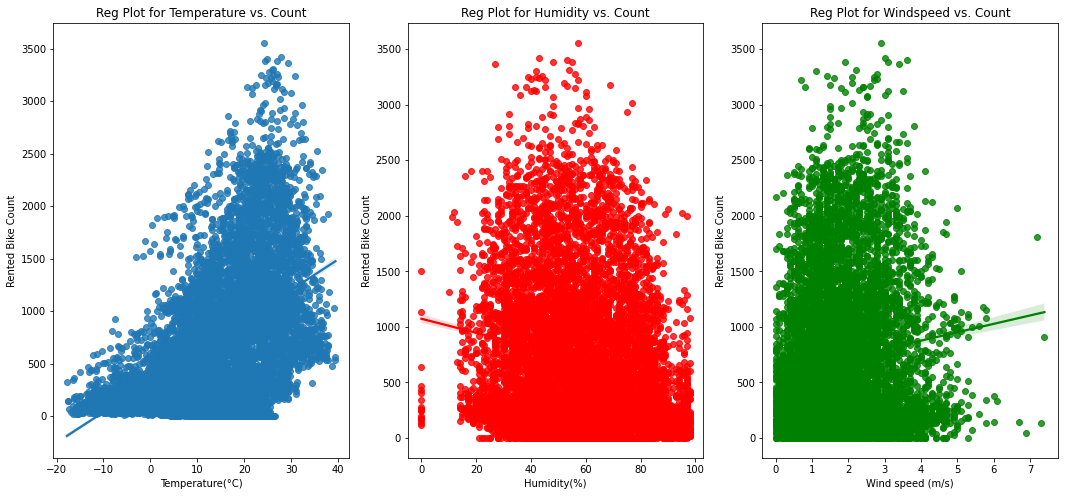

In [ ]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=df, x='Temperature(°C)', y='Rented Bike Count',ax=axes)
axes.set(title='Reg Plot for Temperature vs. Count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=df, x='Humidity(%)', y='Rented Bike Count',ax=axes, color='r')
axes.set(title='Reg Plot for Humidity vs. Count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=df, x='Wind speed (m/s)', y='Rented Bike Count',ax=axes, color='g')
axes.set(title='Reg Plot for Windspeed vs. Count')
plt.show()

The above regplot indicates a positive correlation of count with temperature and windspeed and a negative correlation with humidity

#Inference :


---




> In the comparison between "**hour vs rented count of bikes**" we can clearly notice a high demand in the rush hour of 8:00 am to 9:00 pm.


> In the comparison between "**holiday-non holiday vs rented count of bikes**" we get the notion of high demand of bikes during non holiday i.e working days compared to holidays i.e non working days

> Demand of Rented Bike gradually decreases with increase in rainfall.

> Same pattern of decrease in demand is observed with the increase in snowfall.

> In the Winter Months the Demand decreases i.e, December, January, February, However demand spikes up in Summer months i.e May, June , July.






#Let's Create a Functions to Train the Model and Calculate the Scores

In [ ]:
#To store the evaluation matrix, Let's create a list of matrix
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

Creating a function to train and evaluate the linear model.

In [ ]:
def train_linear_model(model, X_train,y_train,X_test,y_test):
#training the model
  model.fit(X_train,y_train)
#predicting the values
  pred=model.predict(X_test)
  import math 
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import r2_score

  print("\n Here's the evaluation matrix")

#MEAN_SQUARED_ERROR
  MSE = mean_squared_error(y_test**2,pred**2)
  print("MSE:", MSE)

#ROOT_MEAN_SQUARED_ERROR
  RMSE = np.sqrt(MSE)
  print("RMSE:", RMSE)

#R2_score
  r2 = r2_score(y_test**2,pred**2)
  print("R2:",r2)

#Adjusted_r2
  adj_r2 = 1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'adj_r2:{adj_r2}')
  print("\n ========================================================")


#Now let's append the matrix to the list
 
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)


  print("\n Evaluation Graph")
  plt.figure(figsize=(25,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

Creating a new function to train different models

In [ ]:
def run_model(model, X_train,y_train,X_test,y_test):
#training the model
  model.fit(X_train,y_train)
#predicting the values
  pred=model.predict(X_test)
  import math 
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import r2_score

  print("\n Here's the evaluation matrix")

#MEAN_SQUARED_ERROR
  MSE = mean_squared_error(y_test**2,pred**2)
  print("MSE:", MSE)

#ROOT_MEAN_SQUARED_ERROR
  RMSE = np.sqrt(MSE)
  print("RMSE:", RMSE)

#R2_score
  r2 = r2_score(y_test**2,pred**2)
  print("R2:",r2)

#Adjusted_r2
  adj_r2 = 1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'adj_r2:{adj_r2}')
  print("\n ========================================================")


#Now let's append the matrix to the list
 
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)


  print("\n --------------------------------------------------------------------------Evaluation Graph-----------------------------------------------------------------------------------------------")
  plt.figure(figsize=(25,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
  plt.show()

#Creating a Function to get importance of features

In [ ]:
def get_important_feat(optimal_model,X_train):
  features=X_train.columns
  importances=optimal_model.feature_importances_
  indices = np.argsort(importances)
  
  plt.figure(figsize=(15,10))
  plt.title('Importance of Features')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Importance of Relative')

  plt.show()

##Train|Test Split for Linear regression

In [ ]:
#Splitting the data - train
X=final_df.drop(['Rented Bike Count'],axis=1)


In [ ]:
X.shape

(8760, 16)

In [ ]:
y = np.sqrt(final_df['Rented Bike Count'])

Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model= LinearRegression()


 Here's the evaluation matrix
MSE: 173825.05084628175
RMSE: 416.92331530664217
R2: 0.57720506701081
adj_r2:0.5740919888111657


 Evaluation Graph


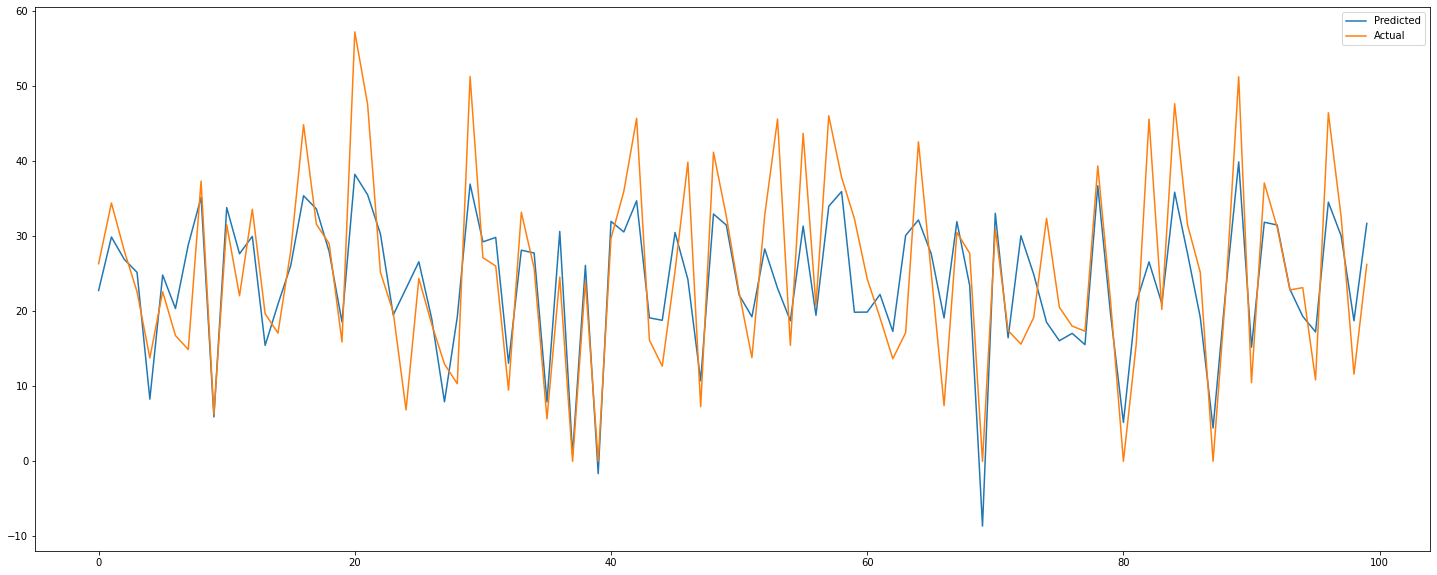

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

R2 value is moderate spotted here with 0.57 it's not capturing max variance so this model is not working in this scenario

#Lasso Regression

In [ ]:
#importing the lasso model..
from sklearn.linear_model import Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


 Here's the evaluation matrix
MSE: 174301.7239421379
RMSE: 417.4945795362353
R2: 0.5760456543217927
adj_r2:0.5729240392592748


 Evaluation Graph


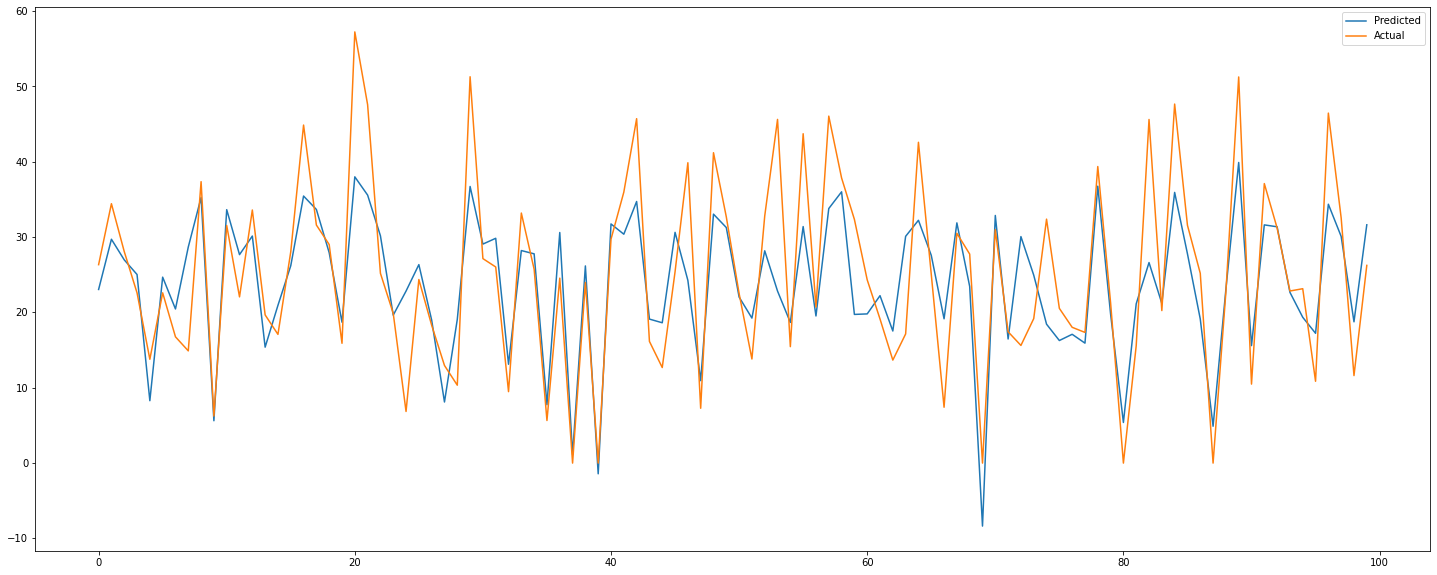

In [ ]:
# Create an instance of Lasso Regression implementation
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
#calling the train_linear_model to train, fit and evaluate the model.
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

The r2_score for the test set is 0.57,  This means our linear model is not performing well on the data.

#Ridge Regression



 Here's the evaluation matrix
MSE: 173889.66878238326
RMSE: 417.00080189657103
R2: 0.5770478967075026
adj_r2:0.573933661248377


 Evaluation Graph


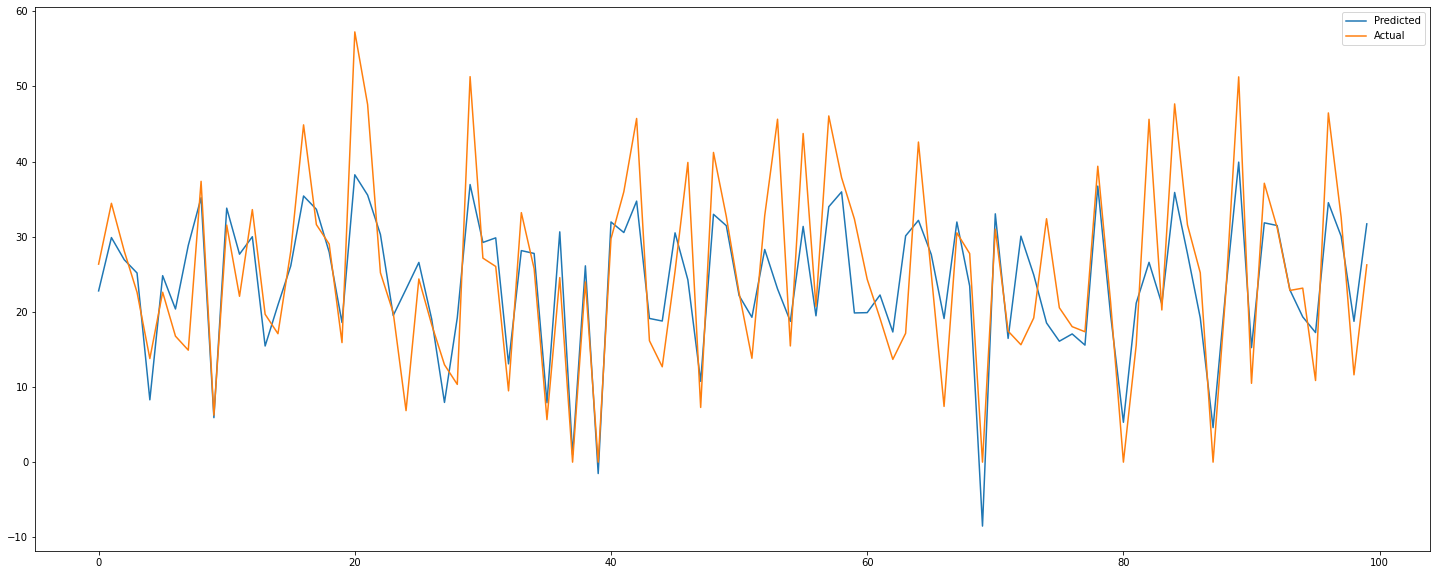

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
# finding the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
# calling train_linear_model to train,fit and evalution of ridge model
train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

Checking our try on the regression model we get the r2 value and adjusted r2 value of 0.57 that means it's capturing 57% accuracy rate which is not feasible for this scenario.

#ELASTIC NET REGRESSION

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


 Here's the evaluation matrix
MSE: 173862.77969024665
RMSE: 416.9685595944215
R2: 0.5771132990868069
adj_r2:0.5739995451914497


 Evaluation Graph


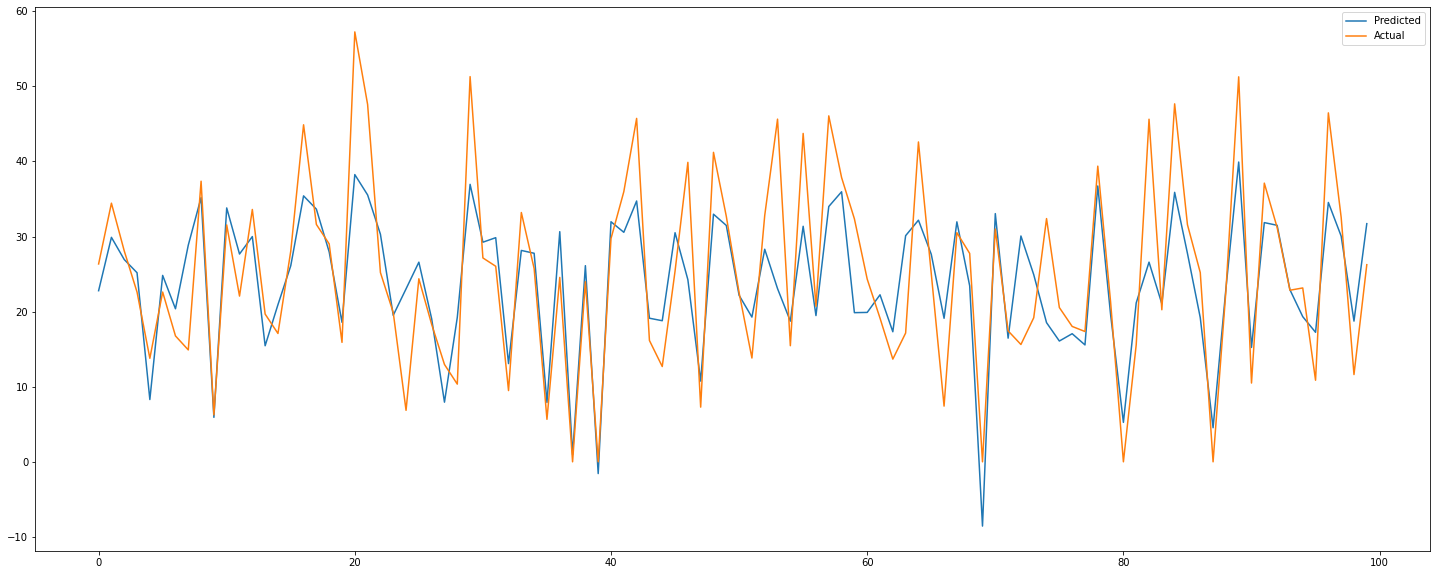

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
#finding  the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

#calling the training model to train, fit and evaluate of elastic model
train_linear_model(elastic_grid, X_train,y_train,X_test,y_test)

Elastic Net regression Model also provides the accuracy rate of 57% not feasible.

#Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,



 Here's the evaluation matrix
MSE: 98155.18391470876
RMSE: 313.29727722198413
R2: 0.7612569983226407
adj_r2:0.7594991115178373


 --------------------------------------------------------------------------Evaluation Graph-----------------------------------------------------------------------------------------------


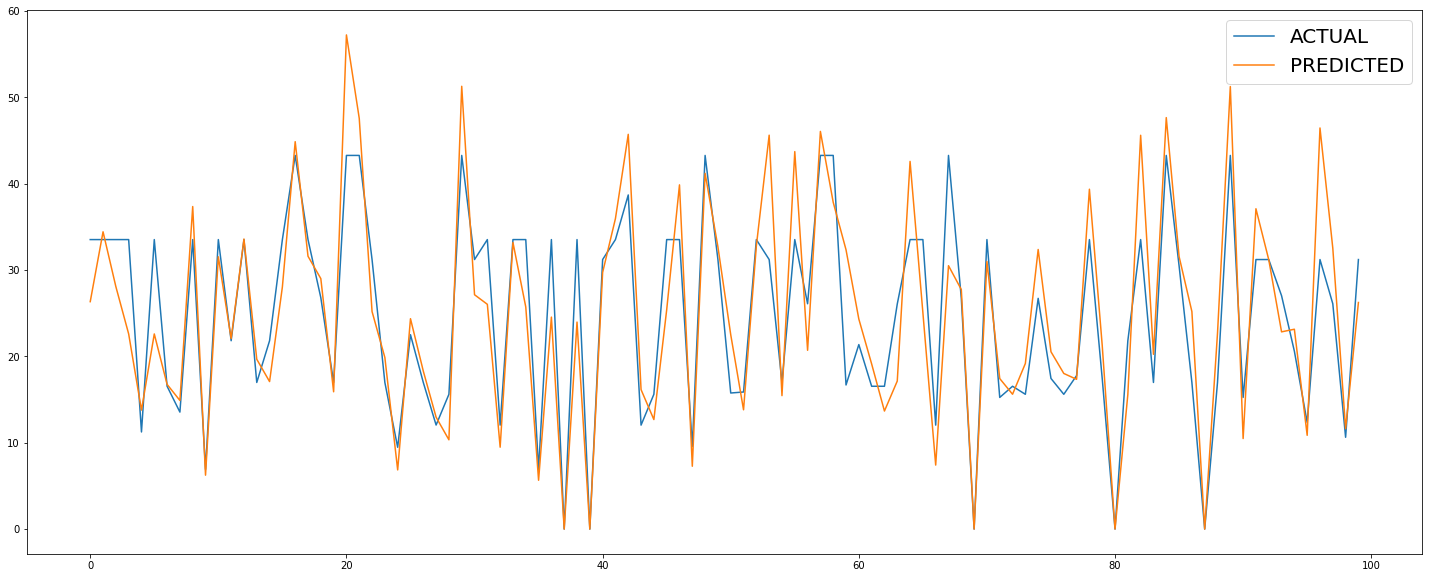

In [ ]:

#creating the dt model
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
dt_model = decision_regressor
#calling the run_model to train,fit and evaluate the dt_model
run_model(dt_model,X_train,y_train,X_test,y_test)

Phew...Found a model who captures a good rate of variance but though not much accurate we can keep this for further comparisons

Checking the importance of our features according the decision trees


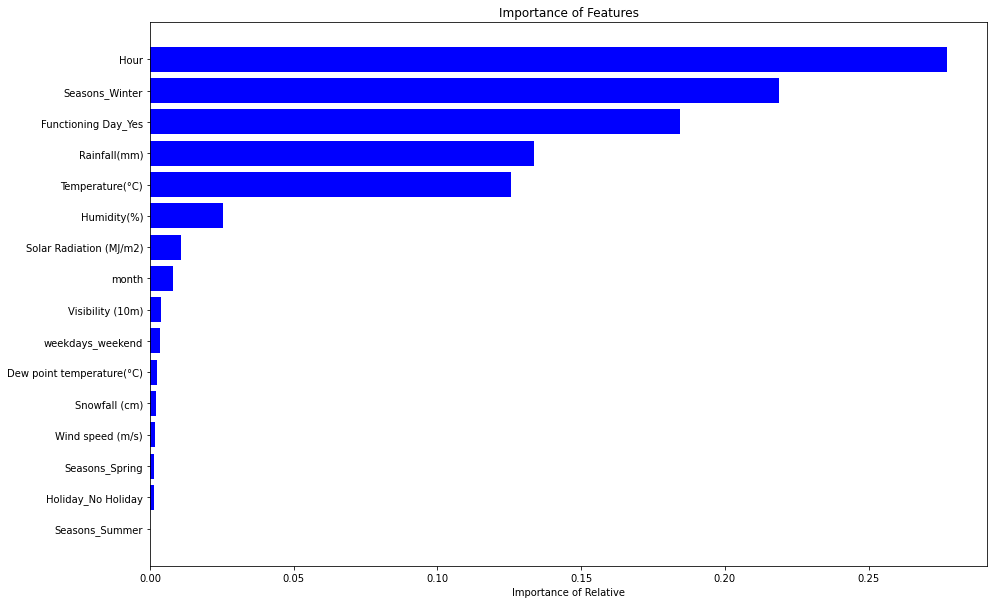

In [ ]:
get_important_feat(dt_model,X_train)

#Random Forest

In [ ]:
#importing random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#creating the model of random forest
rf_model = RandomForestRegressor()

In [ ]:
#creating param dict to check random forest with different value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run random forest model with gridsearch cv
rf_grid = GridSearchCV(rf_model,param_grid=params,verbose=0)


 Here's the evaluation matrix
MSE: 48418.37916881315
RMSE: 220.04176687350326
R2: 0.8822319034197973
adj_r2:0.8813647660312638


 --------------------------------------------------------------------------Evaluation Graph-----------------------------------------------------------------------------------------------


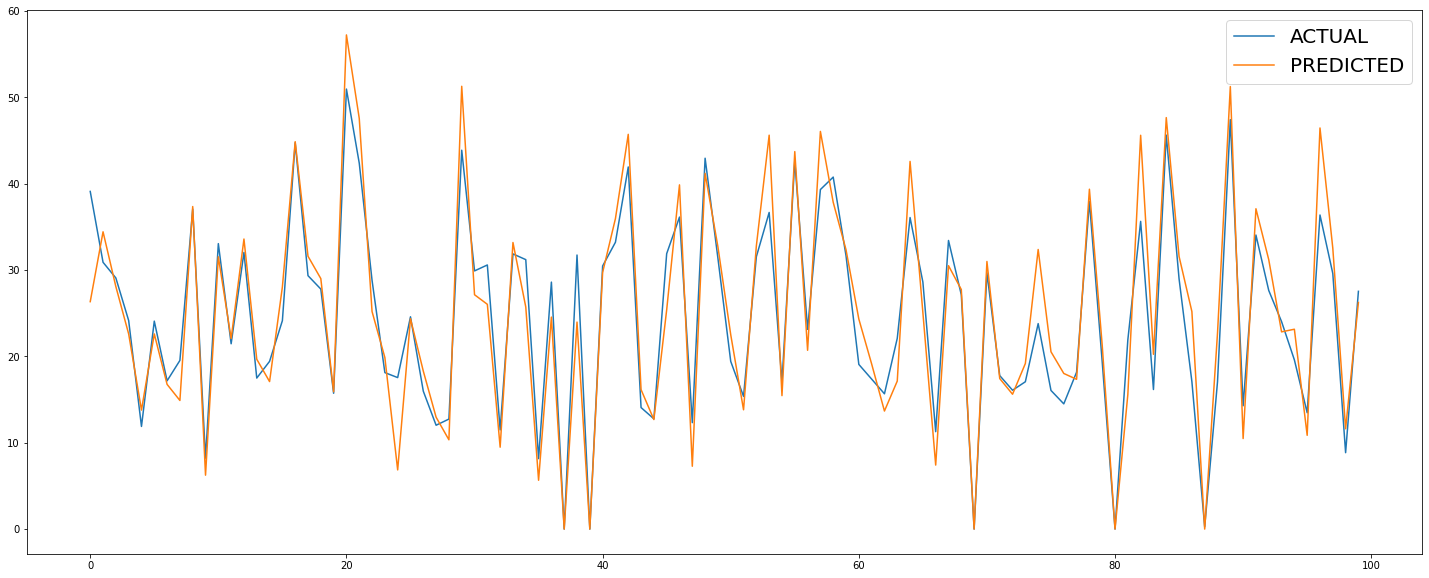

In [ ]:
#calling run_model to train, fit and evaluate
run_model(rf_grid,X_train,y_train,X_test,y_test)

Woah! Catch the accuracy rate of 88% that's pretty good for a model to perform, let's try some more models.

In [ ]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

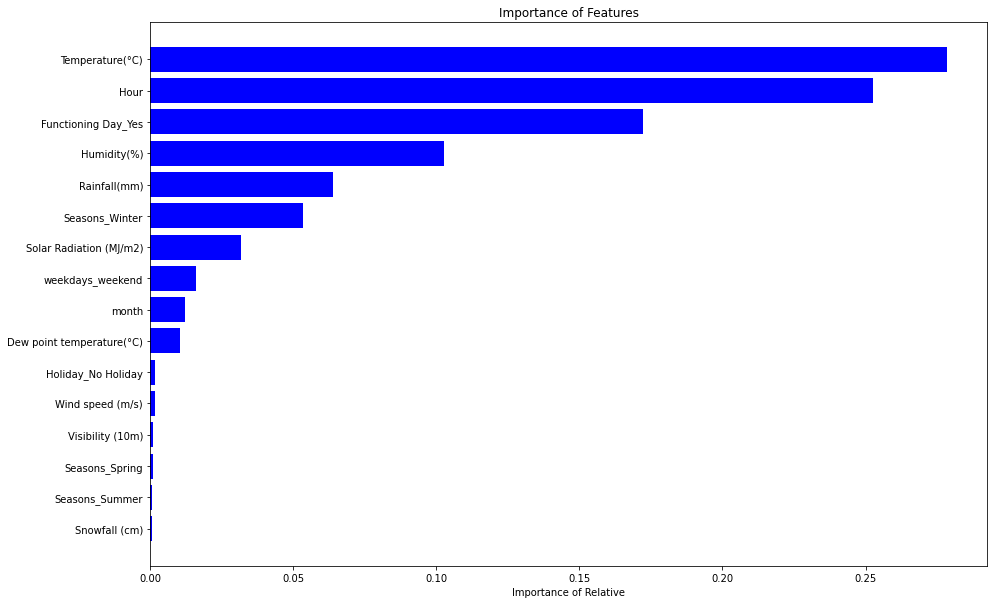

In [ ]:
get_important_feat(optimal_rf_model,X_train)

#Gradient Boosting

In [ ]:
#importing the Gradient Boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Creating the model
gb_model = GradientBoostingRegressor()
#creating the parameters dict to check the value of param
n_estimators = [70,120,150]
max_depth = [15,25,30]
#creating the dict
params ={'n_estimators':n_estimators,'max_depth':max_depth}

In [ ]:
#grid search for gradient boosting
gb_grid=GridSearchCV(gb_model,param_grid=params,verbose=0)


 Here's the evaluation matrix
MSE: 36512.71872734761
RMSE: 191.08301527699317
R2: 0.911190059243913
adj_r2:0.9105361434353086


 --------------------------------------------------------------------------Evaluation Graph-----------------------------------------------------------------------------------------------


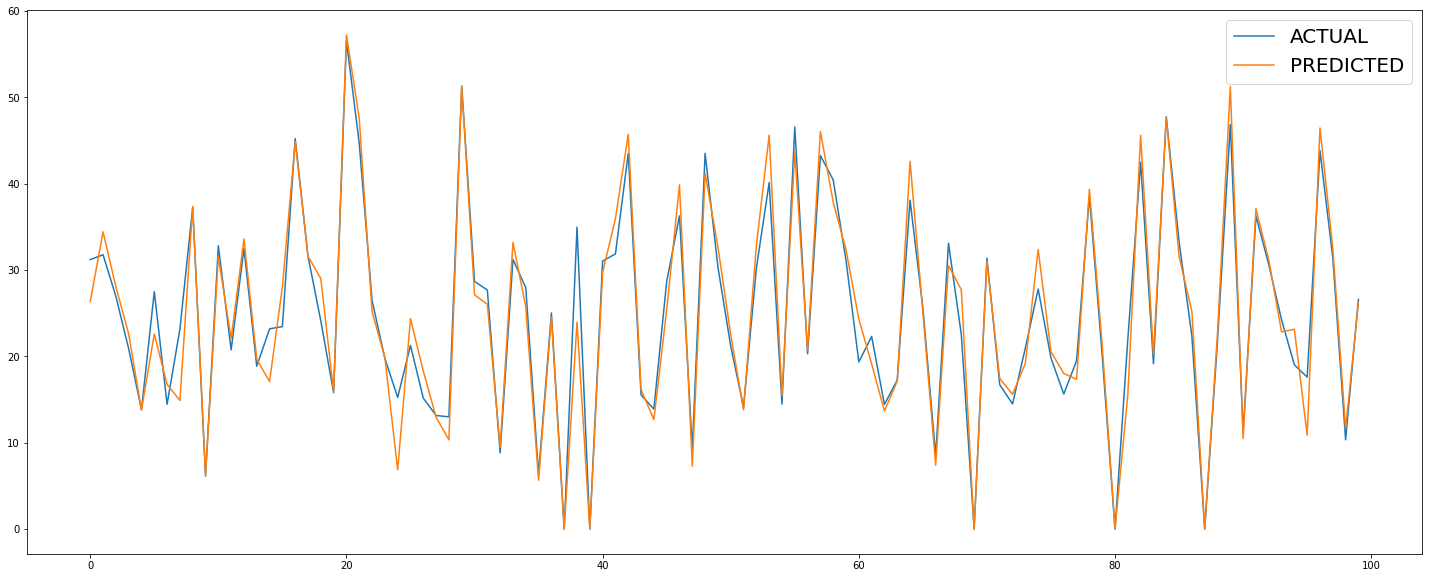

In [ ]:
#calling the run_model to fit, train and evaluate the gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model = gb_grid.best_estimator_



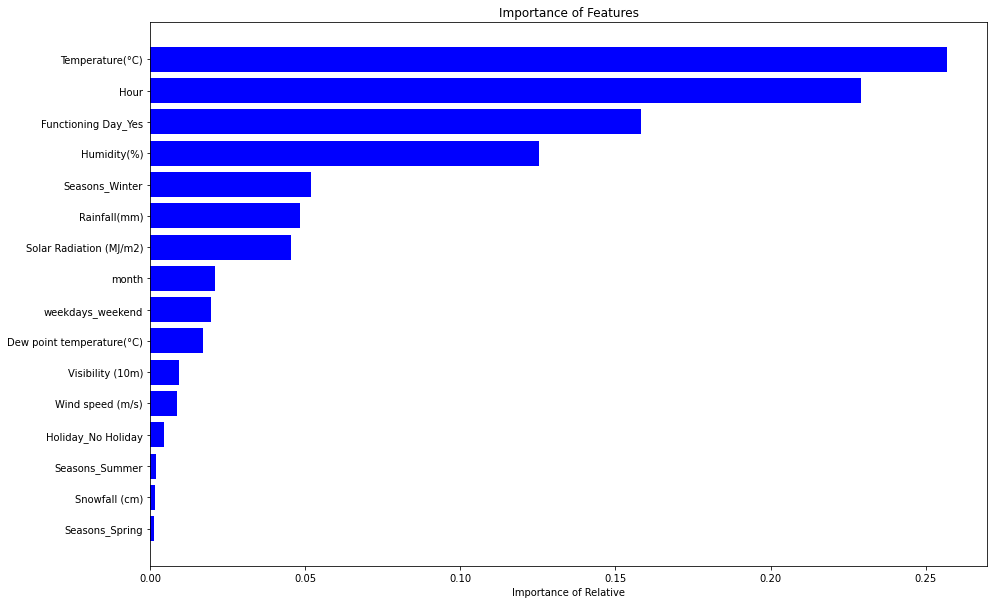

In [ ]:
#visualizing the best importance of features
get_important_feat(optimal_gb_model,X_train)

91% accuracy rate, enters the show of model comparison and variance capture between actual and predicted.

#Extreme Gradient Boosting (XGBOOST)
  

In [ ]:
#importing XGboost regressor 
from xgboost import XGBRegressor

In [ ]:
#creating Xgboost model
xgb_model = XGBRegressor()

In [ ]:
#creating param dict for gridsearch 
n_estmators =[75,120,160]
max_depth = [15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth}

In [ ]:
#creating xgb grid model
xgb_grid = GridSearchCV(xgb_model,param_grid=params,verbose=0)

[09:21:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

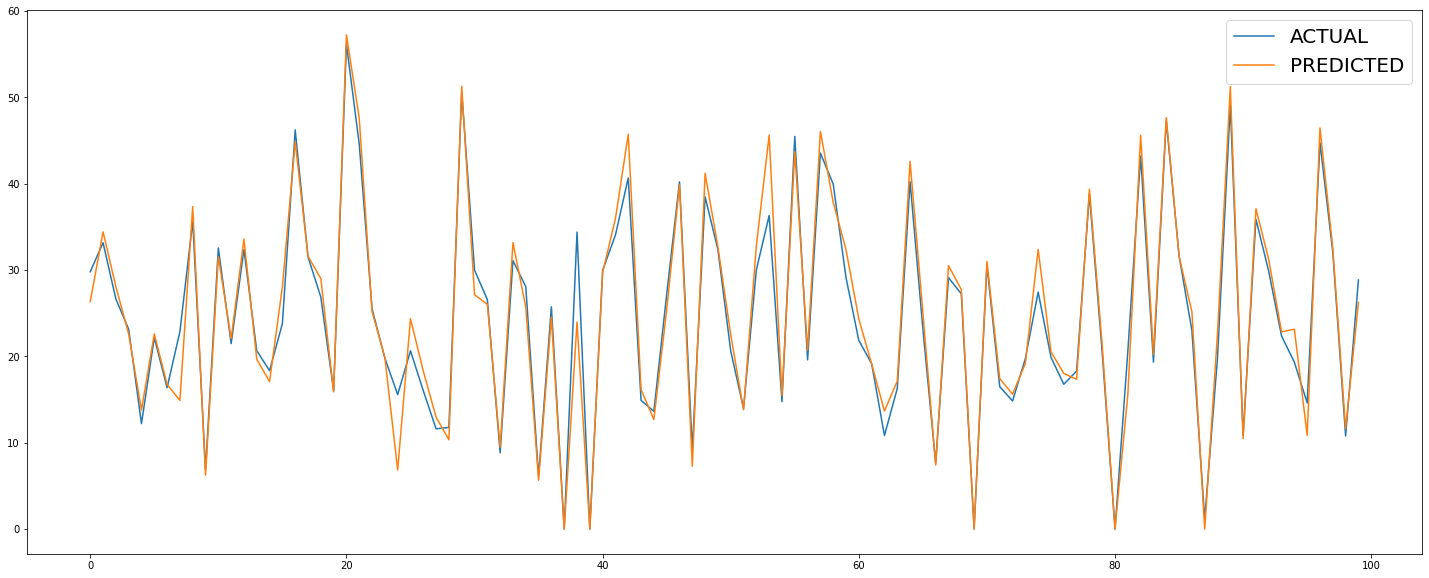

In [ ]:
#calling run_model to train,fit and evaluate of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

Low RMSE rate, accuracy rate of 93%, r2 score of 0.93 which makes this model more refined to make predictions and deployable.

In [ ]:
#getting best estimator of xgb model given by xgb grid
optimal_xgb_model=xgb_grid.best_estimator_


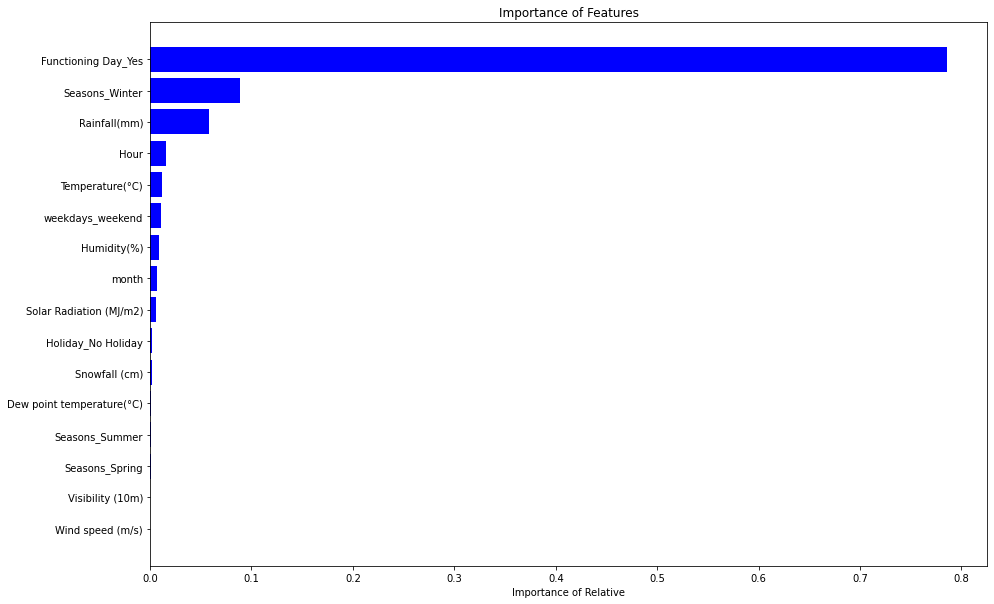

In [ ]:
#getting best param of random forest model given by xgb_grid model
get_important_feat(optimal_xgb_model,X_train) 

#Combined Evaluation of Matrix of ALL the MODELS

In [ ]:
#Creating a dictionary to store all the models
all_mat = {'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [ ]:
#List of all the models made
model_name=['Linear','Lasso','Ridge','Elasticnet','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB']

In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_mat,orient="index",columns=model_name)

In [ ]:
matrices_df


,Linear,Lasso,Ridge,Elasticnet,Decision_Tree,Random_Forest,Gradient_Boosting,Xtreme_GB
Mean_square_error,173825.050846,174301.723942,173889.668782,173862.779690,98155.183915,48418.379169,36512.718727,27930.248082
Root_Mean_square_error,416.923315,417.494580,417.000802,416.968560,313.297277,220.041767,191.083015,167.123452
R2,0.577205,0.576046,0.577048,0.577113,0.761257,0.882232,0.911190,0.932065
Adjusted_R2,0.574092,0.572924,0.573934,0.574000,0.759499,0.881365,0.910536,0.931565


In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_mat=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
final_mat

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,173825.050846,416.923315,0.577205,0.574092
1,Lasso,174301.723942,417.494580,0.576046,0.572924
2,Ridge,173889.668782,417.000802,0.577048,0.573934
3,Elasticnet,173862.779690,416.968560,0.577113,0.574000
4,Decision_Tree,98155.183915,313.297277,0.761257,0.759499
5,Random_Forest,48418.379169,220.041767,0.882232,0.881365
6,Gradient_Boosting,36512.718727,191.083015,0.911190,0.910536
7,Xtreme_GB,27930.248082,167.123452,0.932065,0.931565


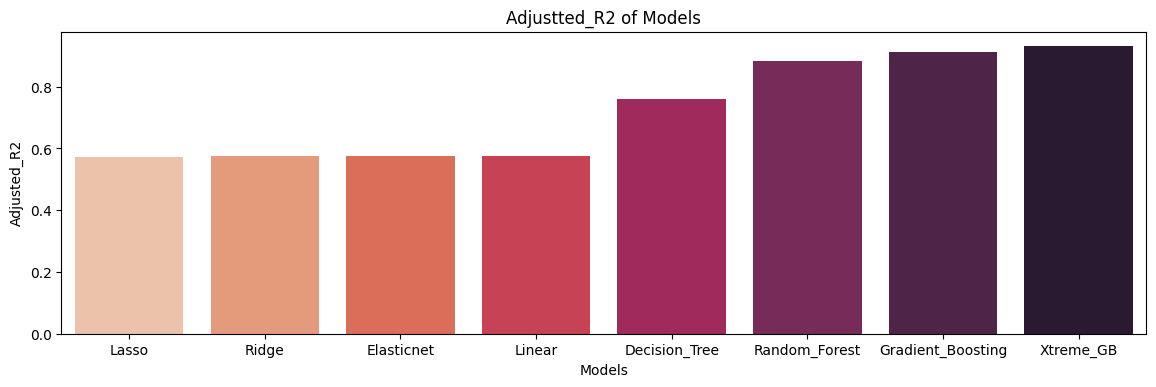

In [ ]:
#Creating bar plot to visualize the adjusted R2 of model
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_mat.sort_values('Adjusted_R2'),palette="rocket_r").set(title='Adjustted_R2 of Models')
plt.show()



*   No overfitting is seen.
*   Random_Forest Regressor, Gradient_Boosting and Xtreme_GB gives the highest R2 score of 99% and 95% respectively

*   We can deploy this model.
*   However, this is not the ultimate end, as the data is time dependent for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well.














#Final Conclusion


> **Data Exploration Conclusions**

In the comparison between "hour vs rented count of bikes" we can clearly notice a high demand in the rush hour of 8:00 am to 9:00 pm.

In the comparison between "holiday-non holiday vs rented count of bikes" we get the notion of high demand of bikes during non holiday i.e working days compared to holidays i.e non working days

Demand of Rented Bike gradually decreases with increase in rainfall.

Same pattern of decrease in demand is observed with the increase in snowfall.

In the Winter Months the Demand decreases i.e, December, January, February, However demand spikes up in Summer months i.e May, June , July.



> **Modeling Conclusions**
We used 8 Regression Models to predict the bike rental count at any hour of the day - 'Linear','Lasso','Ridge','Elasticnet','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB'. Using the predictions made by these level 1 individual models as features, we trained 4 level 2 stacking algorithms (Linear Regression, Random Forest Gradient Boost and Xtreme Gradient Boosting) to make more refined predictions. Below is a summary of the model performances

Of all the models, we found a simple XGBoost Model providing the best/lowest RMSE score and the adjusted_r2 of 99% which made the model deployable.


> **More Gained Inference** 

* In holiday or non-working days there is demands in rented bikes.

* There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

* People prefered more rented bikes in the morning than the evening.

* When the rainfall was less, people have booked more bikes except some few cases.

* The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

